# Supplementary Figure 16: DFE Tests

In [ ]:
import sys
import os
import logging
import time
import argparse
import warnings

In [7]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
import ast
import matplotlib.cm as cm

## Load the general data

In [8]:
#True parameters
shape_true=0.186
scale_true=875.0
Na_true=10000
s_dhet_true=scale_true/(2*Na_true)

mu=1.5E-8
Ls=9728061

title_conditions={'SLiM_True_DFE':'True model', 'Zero':'$s=0$', 'E5':'$s=1e^{-05}$', 'E4':'$s=1e^{-4}$',
                  'E3': '$s=1e^{-3}$', 'E5_Partial':'22% at $s=1e^{-05}$' ,'E3_Partial':'22% at $s=1e^{-03}$', 
                  'E4_Partial':'22% at $s=1e^{-04}$'}

color_conditions={'SLiM_True_DFE':'#99b3ff', 'Zero':'#3366ff', 'E5':'#267326', 'E4':'#9bc238',
                  'E3': '#7D2FB9', 'E5_Partial':'#cc0000' ,'E3_Partial':'#E6BE00', 
                  'E4_Partial':'#ff6600'}

syn_theta_data={'Zero': {'1': 5770.831556694766, '2': 5679.159790871198, '3': 5251.399303239752, '4': 5551.33828762317, '5': 5734.903900062512, '6': 5758.2761928179025, '7': 5777.7852966881055, '8': 5769.28628114069, '9': 5447.816744184638, '10': 5729.109116734729, '11': 5689.511430661545, '12': 5576.902877337449, '13': 5623.517371885801, '14': 5699.748881207295, '15': 5711.917926195639, '16': 5740.505523946035, '17': 5703.998388980776, '18': 5800.384951666459, '19': 5724.473290072276, '20': 5652.617976807994}, 
                'E4': {'1': 1503.3277661614686, '2': 1739.8902170971123, '3': 1442.2508861987671, '4': 1714.067882319712, '5': 1893.924175635029, '6': 2055.8495414732797, '7': 1821.2508041229773, '8': 2111.243219321488, '9': 1606.8291493319434, '10': 1573.4761940287922, '11': 1614.547862606907, '12': 1626.7775644354263, '13': 1815.4597423459818, '14': 1884.0917824507503, '15': 1948.9691816792017, '16': 1644.9196010247454, '17': 1511.4208313151637, '18': 1851.6581136880136, '19': 1698.4150780401912, '20': 1857.063152414975}, 
                'E3': {'1': 1.9335325662026908, '2': 1.9359687191392785, '3': 1.922266927702268, '4': 2.2227733887266115, '5': 2.8361145532125063, '6': 1.9165786198955783, '7': 2.1419922824899915, '8': 1.9315837676996643, '9': 2.0901827188322515, '10': 2.038560781411968, '11': 2.4654926432635884, '12': 1.976115827711576, '13': 2.4937981990243863, '14': 1.9280414321429369, '15': 1.9333865130386179, '16': 2.0547053019879082, '17': 1.967324043141496, '18': 2.5191325337011747, '19': 2.0244803443503128, '20': 2.482519031450116}, 
                'E5': {'1': 5310.9635625882565, '2': 4469.948167436728, '3': 5267.400201941446, '4': 5155.602835021811, '5': 5191.176613939037, '6': 5167.940613465972, '7': 3588.121082787052, '8': 4348.172337303504, '9': 5207.281063240058, '10': 5131.199877784881, '11': 4346.731525532607, '12': 848.5835826389638, '13': 4791.692075509972, '14': 5415.899990249632, '15': 1189.5443980205903, '16': 4813.979543003429, '17': 5250.070283617126, '18': 5403.168623226593, '19': 4970.95745589056, '20': 5112.5350858560905}, 
                'E5_Partial': {'1': 5393.689750159972, '2': 5686.420879553394, '3': 5680.046617892833, '4': 5397.847082667908, '5': 1050.3134359384946, '6': 5494.2211379213, '7': 5093.210183836459, '8': 5782.614282794361, '9': 5645.388947648372, '10': 5730.074913955798, '11': 5669.036529570046, '12': 5680.626096225386, '13': 5529.915573539463, '14': 5677.7287045617195, '15': 5355.167318091468, '16': 5454.942700242703, '17': 5720.803260631573, '18': 5488.034993943788, '19': 5675.990269563385, '20': 942.7291152999991}, 
                'E3_Partial': {'1': 4391.577203674086, '2': 4322.001860802991, '3': 4303.839146636993, '4': 4424.6156985418265, '5': 4267.768044743032, '6': 4373.608625868483, '7': 4436.339698993257, '8': 4408.112316419042, '9': 4410.941268286445, '10': 4447.755410813714, '11': 4377.680658499566, '12': 4431.931278314434, '13': 4397.385093498345, '14': 4455.1549947673175, '15': 4356.032621252616, '16': 4441.811082776953, '17': 4465.211538618771, '18': 4340.597393345542, '19': 4335.306876103004, '20': 4354.511099091319}, 
                'E4_Partial': {'1': 4837.521981238725, '2': 4722.4699909107385, '3': 4811.923438249552, '4': 5108.591370072904, '5': 4359.754024662157, '6': 4995.430177323818, '7': 4854.858403160825, '8': 4849.685965076534, '9': 4881.341339597723, '10': 4467.748344354185, '11': 5058.674493908847, '12': 4709.489182532087, '13': 5125.8503383870575, '14': 4947.2668668892575, '15': 4580.70274192427, '16': 4448.090252387428, '17': 5116.489099528451, '18': 4765.952313682789, '19': 4839.484068159702, '20': 4713.617473061899}}

dfe_parameters_data={'Zero': {'1': [0.193644799, 589.255658], '2': [0.177894713, 846.027542], '3': [0.180493097, 698.796128], '4': [0.182655171, 757.892613], '5': [0.187581251, 692.387833], '6': [0.190756644, 640.277876], '7': [0.194293489, 619.600853], '8': [0.187207264, 670.497746], '9': [0.175330807, 933.08087], '10': [0.183189668, 692.886405], '11': [0.191891943, 586.558254], '12': [0.18118518, 765.663799], '13': [0.184923228, 753.859443], '14': [0.193173329, 582.479029], '15': [0.190215957, 605.360699], '16': [0.197617323, 513.965619], '17': [0.191500659, 601.211055], '18': [0.190159779, 646.973511], '19': [0.182929261, 725.484684], '20': [0.194295378, 534.141822]}, 
                     'E4': {'1': [0.0547699365, 149044.666], '2': [0.067157023, 25902.6375], '3': [0.0658182858, 22957.2355], '4': [0.0584550685, 94570.2965], '5': [0.0561711886, 156757.633], '6': [0.0691580322, 28786.0008], '7': [0.067200905, 24332.4762], '8': [0.0609637355, 75668.6426], '9': [0.0592451638, 70139.0446], '10': [0.0561160259, 133484.32], '11': [0.0646691593, 30371.8402], '12': [0.056615294, 141816.578], '13': [0.0628009921, 51956.2024], '14': [0.0511350117, 464146.116], '15': [0.0597011494, 73663.2888], '16': [0.0550294669, 171547.049], '17': [0.063027786, 37330.376], '18': [0.0648600286, 33616.5828], '19': [0.0597146949, 66703.0563], '20': [0.0676387523, 25789.1612]}, 
                     'E3': {}, 
                     'E5': {'1': [0.17044207, 962.571049], '2': [0.174740388, 671.94882], '3': [0.169971106, 833.196927], '4': [0.170855443, 815.768361], '5': [0.173625091, 845.756792], '6': [0.168178422, 940.669167], '7': [0.170580834, 576.995518], '8': [0.175197883, 609.579638], '9': [0.180446477, 625.377861], '10': [0.167223065, 942.581099], '11': [0.1745374, 629.760552], '12': [0.16542634, 157.19830994], '13': [0.180471973, 560.57572], '14': [0.177922566, 749.536029], '15': [0.17645218, 164.93295215], '16': [0.171602017, 781.197122], '17': [0.162769478, 1032.77673], '18': [0.183574548, 612.57508], '19': [0.163291541, 1052.1132], '20': [0.168396707, 940.720525]}, 
                     'E5_Partial': {'1': [0.17460457, 890.970996], '2': [0.18824954, 668.663886], '3': [0.201410562, 462.792997], '4': [0.179881709, 762.516951], '5': [0.18769207, 128.36850568], '6': [0.188444467, 628.283702], '7': [0.174707706, 748.755479], '8': [0.192069377, 611.331912], '9': [0.181607014, 743.586677], '10': [0.198676678, 520.703953], '11': [0.18991598, 636.639125], '12': [0.196053941, 510.413368], '13': [0.171415244, 984.234185], '14': [0.183950321, 709.415731], '15': [0.172974838, 871.640684], '16': [0.170309145, 990.433777], '17': [0.195167738, 553.801721], '18': [0.173191714, 900.7651], '19': [0.194107695, 590.815386], '20': [0.18264048, 123.56654242]}, 
                     'E3_Partial': {'1': [0.125062458, 1494.0925], '2': [0.123275128, 1501.13561], '3': [0.131426286, 1119.43573], '4': [0.128008169, 1419.24403], '5': [0.123706607, 1379.63744], '6': [0.130522027, 1173.51443], '7': [0.140016137, 849.887095], '8': [0.148185894, 665.573027], '9': [0.123376568, 1628.17761], '10': [0.136628512, 1028.48581], '11': [0.126594499, 1505.41597], '12': [0.126663552, 1437.3315], '13': [0.128622294, 1297.95093], '14': [0.136400645, 1000.29395], '15': [0.124065593, 1539.85294], '16': [0.135972596, 1016.74321], '17': [0.138899571, 928.222828], '18': [0.120436511, 1868.28667], '19': [0.141540423, 833.162253], '20': [0.121206644, 1744.43139]}, 
                     'E4_Partial': {'1': [0.169542754, 742.10358], '2': [0.16756193, 809.633979], '3': [0.159781739, 932.029018], '4': [0.158390599, 1118.79015], '5': [0.15974768, 894.602748], '6': [0.159529486, 1051.01489], '7': [0.155871879, 1085.62636], '8': [0.165668872, 805.718134], '9': [0.152088977, 1242.95469], '10': [0.161328561, 756.428397], '11': [0.154987538, 1220.20412], '12': [0.157360716, 1008.34061], '13': [0.163339225, 966.637726], '14': [0.162486667, 985.481027], '15': [0.159285912, 983.181707], '16': [0.157687741, 1053.23797], '17': [0.166992257, 838.653379], '18': [0.164034481, 917.600153], '19': [0.173687647, 708.356562], '20': [0.163413059, 936.416744]}}


#Turn the original data into a DataFrame
#Build a dataframe for the data for plotting
dfe_dataframe=[] #row of the format condition, type(either Na or Ncurr), replicate_id, N_value

for condition in dfe_parameters_data:   
    new_rows=[[condition, replicate_id, dfe_parameters_data[condition][replicate_id][0], dfe_parameters_data[condition][replicate_id][1], syn_theta_data[condition][replicate_id]] for replicate_id in dfe_parameters_data[condition].keys()]
    dfe_dataframe=dfe_dataframe+new_rows

DFE_dataframe=pd.DataFrame(dfe_dataframe, columns=['Condition','Replicate_ID', 'Shape_Param', 'Scale_Param', 'Syn_Theta'])

DFE_dataframe['Na']=DFE_dataframe['Syn_Theta']/(4*Ls*mu)
DFE_dataframe['s_dhet']=DFE_dataframe['Scale_Param']/(2*DFE_dataframe['Na'])

## Load all the replicate data

In [9]:
#Dic with the shape {'condition_dadioutput':[rep_number, rep_number, ...]}
plotting_replicates={'Zero':[3, 4], 'E5':[12, 14], 'E4':[1, 6], 'E5_Partial':[7, 19], 'E4_Partial':[1, 15]}

#All the loglike surfaces and other parameters. Data identified as "condition_dadioutput_Rep{rep_number}"
inferred_dem_params={}
likelihood_mle={}
loglike_surfaces={}
loglike_surfaces_rescaled={}
x_values={}
y_values={}
map_dataid_condition={}

#Dictionary of DataFrames
points_to_test_dfe = {}

all_dataids=[]

for condition in plotting_replicates.keys():
    for rep in plotting_replicates[condition]:
        dataid=f"{condition}_Rep{rep}"
        print(f"Processing {dataid}...")
        map_dataid_condition[dataid]=condition
        all_dataids.append(dataid)

        #Get the originally inferred demographic parameters
        input_file_demography=f"/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/DadiFits_OutputFiles_BugFix/{condition}_TwoEpoch_Replicate{rep}_two_epoch_demography.txt"
      
        with open(input_file_demography, 'r') as file:
            for line in file:
                if 'Maximum multinomial log composite likelihood: ' in line:
                    parsed_params=line.strip().strip('.').split(': ')[1]
                    print(parsed_params)
                    likelihood_model=float(parsed_params)
                    likelihood_mle[dataid]=likelihood_model
                elif 'Best fit parameters: ' in line:
                    parsed_params=line.strip().strip('.').split(': ')[1]
                    parsed_params=parsed_params.strip('[').strip(']')
                    demog_params=[float(x.strip(',')) for x in parsed_params.split()]
                    print(demog_params)
                    inferred_dem_params[dataid]=demog_params
                elif 'Optimal value of theta_syn: ' in line:
                    spl1=line.split(': ')[-1].strip().strip('.')
                    theta_syn_original=ast.literal_eval(spl1)


        #Load the loglike surface
        df=pd.read_csv(f"/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/DadiFits_OutputFiles_BugFix/likelihood_surface_{condition}_Replicate{rep}.csv", index_col=0)
        input_nu, input_tau = demog_params

        like_max = abs(likelihood_model)+10
        like_min = abs(likelihood_model)-10    

        #Prepare the data
        Z = df.pivot_table(index='X', columns='Y', values='Z').T.values
        X_unique = np.sort(df.X.unique())
        Y_unique = np.sort(df.Y.unique())
        X, Y = np.meshgrid(X_unique, Y_unique)

        #Store the x and y values for plotting
        x_values[dataid] = X_unique
        y_values[dataid] = Y_unique

        #Plotting with a log scale color gradient
        Z = np.abs(Z)  # Ensure all values are positive, for log scaling.

        #Rescale with respect to the maximum likelihood
        Z_rescaled = Z - abs(likelihood_model)

        loglike_surfaces[dataid] = Z
        loglike_surfaces_rescaled[dataid] = Z_rescaled

        #Load the demographic points to test for the DFE
        output_file = f"/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/LikelihoodSurface_Tests/points_to_test_{condition}_Replicate{rep}.txt"
        test_points=pd.read_csv(output_file, sep='\t')

        dfe_tests_lines=[]
        #Parse the scaled DFE fit for all the test points
        for index, row in test_points.iterrows():
            test_id = row['Test_ID']
            test_nu = row['nu']
            test_T = row['T']

            print(f"Processing test_id: {test_id}, nu: {test_nu}, T: {test_T}")

            #Parse the file with the DFE parameters
            input_file_dfe='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/LikelihoodSurface_Tests/'+condition+'_TestDemParams_Replicate'+str(rep)+'_Test'+str(test_id)+'_inferred_DFE.txt'    
            input_file_demography='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/LikelihoodSurface_Tests/'+condition+'_TestDemParams_Replicate'+str(rep)+'_Test'+str(test_id)+'_two_epoch_demography.txt'
            input_file_demography_onepoch='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/LikelihoodSurface_Tests/'+condition+'_TestDemParams_Replicate'+str(rep)+'_Test'+str(test_id)+'_one_epoch_demography.txt'
            input_file_log='/u/project/klohmuel/amzurita/Synonimous_Selection_Simulations/Dadi_Fits/LikelihoodSurface_Tests/'+condition+'_TestDemParams_Replicate'+str(rep)+'_Test'+str(test_id)+'_log.log'


            #Extract the best-fit synonymous theta from the two-epoch demography 
            with open(input_file_demography, 'r') as file:
                for line in file:
                    if 'Optimal value of theta_syn: ' in line:
                        spl1=line.split(': ')[-1].strip().strip('.')
                        syn_theta_twoepoch=ast.literal_eval(spl1)
                        print(f"Best-fit theta_syn for test_id {test_id}: {syn_theta_twoepoch}")
                    elif 'Maximum multinomial log composite likelihood: ' in line:
                        twoepoch_ll=ast.literal_eval(line.split(': ')[-1].strip().strip('.'))


            DFE_params_all=[]
            Non_Syn_SFS_all=[]
            poisson_ll_all=[]

            with open(input_file_dfe, 'r') as file:
                for line in file:
                    if 'The population-scaled best-fit parameters: ' in line:
                        DFE_params_toparse=line.strip().strip('.').split(': ')[1]
                        DFE_params=DFE_params_toparse.strip('[').strip(']').split()
                        print(DFE_params)
                        DFE_params_all.append([float(x) for x in DFE_params])
                    elif 'The expected SFS is: ' in line:
                        parsed_params=line.strip().strip('.').split(': ')[1]
                        parsed_params=parsed_params.strip('[--').strip('--]')
                        values=parsed_params.split()
                        dadi_nonsyn_sfs=[float(x) for x in values]
                        dadi_nonsyn_sfs.append(0)
                        dadi_nonsyn_sfs=np.array(dadi_nonsyn_sfs)
                        Non_Syn_SFS_all.append(dadi_nonsyn_sfs)
                        #print(dadi_nonsyn_sfs)
                    elif 'The maximum poisson log composite likelihood is: ' in line:
                        parsed_params=line.strip().strip('.').split(': ')[1]
                        #print(parsed_params)
                        if parsed_params == '--':
                            parsed_params = -np.Infinity
                        poisson_ll_all.append(float(parsed_params))


            #Make into a Dataframe
            for_df=[]
            for parm,like in zip(DFE_params_all, poisson_ll_all):
                values=parm.copy()
                values.append(like)
                for_df.append(values)
                
            params_log_dfe_df=pd.DataFrame(np.array(for_df), columns=['Gamma_Shape','Gamma_Scale','Poisson_LogLike',])

            #Best fit parameters
            i=poisson_ll_all.index(max(poisson_ll_all))
            best_shape=DFE_params_all[i][0]
            best_scale=DFE_params_all[i][1]

            #Create a final list of the shape condition, replicate, test_id, test_nu, test_T, loglike_demparams, syn_theta, best_shape, best_scale, poisson_ll_all[i]
            dfe_tests_lines.append([condition, rep, test_id, test_nu, test_T, twoepoch_ll, syn_theta_twoepoch, best_shape, best_scale, poisson_ll_all[i]])

            df_tests=pd.DataFrame(dfe_tests_lines, columns=['Condition_dadi', 'Replicate_ID', 'Test_ID', 'nu', 'T', 'DemParam_LogLike', 'Syn_Theta', 'Best_Gamma_Shape', 'Best_Gamma_Scale', 'Poisson_LogLike'])

            #Compute the Na and add it to the dataframe
            df_tests['Na'] = df_tests['Syn_Theta'] / (4 * mu * Ls)

            #Put the scale parameter in terms of s_dhet
            df_tests['s_dhet'] = df_tests['Best_Gamma_Scale'] / (2 * df_tests['Na'])

            #Add the DataFrame to the dictionary
            points_to_test_dfe[dataid] = df_tests


Processing Zero_Rep3...
[1.10851926, 1.29216266]
-387.87189741300654
Processing test_id: 1, nu: 1.1841931976885909, T: 2.289316207277853
Best-fit theta_syn for test_id 1: 4936.563399667778
['1.84079578e-01', '6.32493803e+02']
['1.84079581e-01', '6.32493640e+02']
['1.84079597e-01', '6.32493366e+02']
['1.84079637e-01', '6.32492767e+02']
['1.84079882e-01', '6.32488803e+02']
['1.84079050e-01', '6.32502319e+02']
['1.84079734e-01', '6.32488830e+02']
['1.84079750e-01', '6.32488297e+02']
['1.84079477e-01', '6.32499767e+02']
['1.84079045e-01', '6.32497584e+02']
['1.84078934e-01', '6.32507536e+02']
['1.84078149e-01', '6.32516492e+02']
['1.84081333e-01', '6.32466118e+02']
['1.84079060e-01', '6.32493203e+02']
['1.84076825e-01', '6.32536137e+02']
['1.84081674e-01', '6.32475187e+02']
['1.84076867e-01', '6.32518646e+02']
['1.84081121e-01', '6.32449858e+02']
['1.84084827e-01', '6.32408552e+02']
['1.84086440e-01', '6.32378759e+02']
['1.84080116e-01', '6.32451060e+02']
['1.84073628e-01', '6.32606241e+02

# Plot a single replicate in a two panel figure

In [10]:
color_scheme= 'jet'
like_max_rescaled = 10
like_min_rescaled = -1

In [11]:
all_dataids

['Zero_Rep3',
 'Zero_Rep4',
 'E5_Rep12',
 'E5_Rep14',
 'E4_Rep1',
 'E4_Rep6',
 'E5_Partial_Rep7',
 'E5_Partial_Rep19',
 'E4_Partial_Rep1',
 'E4_Partial_Rep15']

Plotting for data_id: E4_Rep1, condition: E4


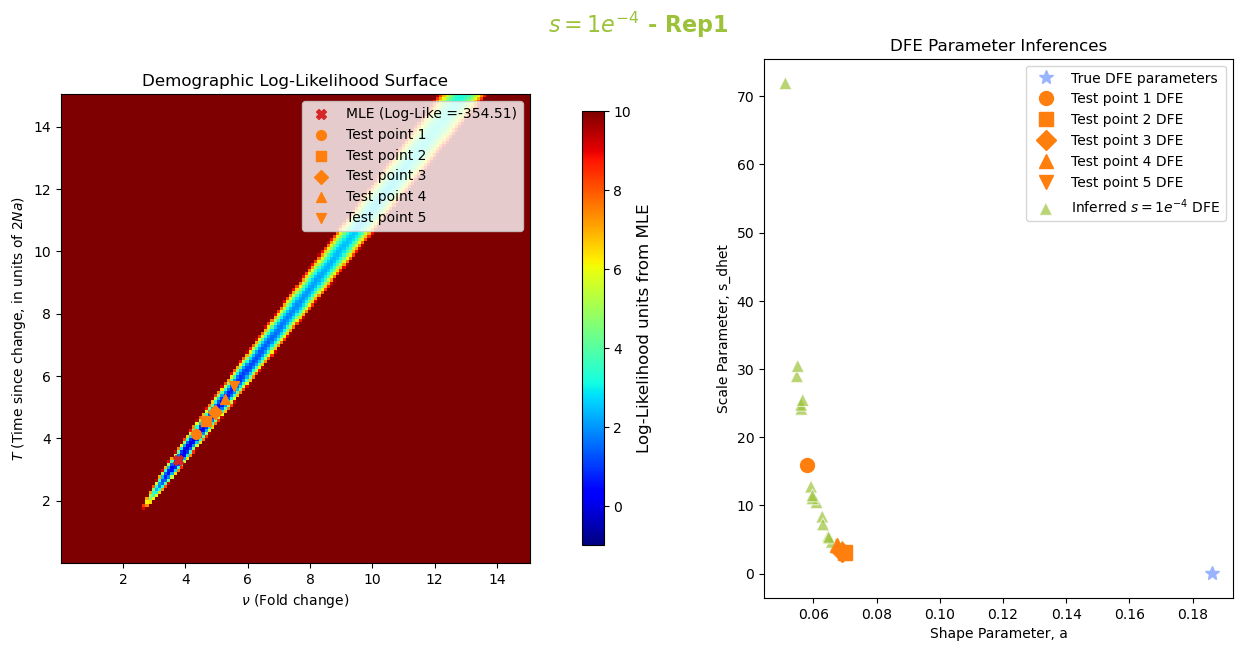

In [16]:
data_id=all_dataids[4]  # Example data_id to plot
condition = map_dataid_condition[data_id]
rep_id = data_id.split('_Rep')[-1]
print(f"Plotting for data_id: {data_id}, condition: {condition}")

# Specify a two panel grid for the plots
fig, axs = plt.subplots(1, 2, figsize=(7, 7))
plt.subplots_adjust(wspace=0.5)
axes = axs.flatten()

# Shared colormap and normalization
norm = Normalize(vmin=like_min_rescaled, vmax=like_max_rescaled)
cmap = cm.get_cmap(color_scheme)

#Plot the LogLike Surface
Z_rescaled=loglike_surfaces_rescaled[data_id]
X_unique = x_values[data_id]
Y_unique = y_values[data_id]
input_nu, input_tau = inferred_dem_params[data_id]
likelihood_model = likelihood_mle[data_id]
point_to_test=points_to_test_dfe[data_id]
ax = axes[0]

#Plot the log-likelihood surface
ax.imshow(Z_rescaled ,cmap=cmap, norm=norm, origin='lower', aspect='equal',\
        extent = [min(X_unique), max(X_unique), min(Y_unique), max(Y_unique)])

#Make the color bar
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
cb = plt.colorbar(mappable, ax=axes, orientation='vertical', fraction=0.04, pad=-1.2)
cb.set_label('Log-Likelihood units from MLE', fontsize=12)

#Add the true value
ax.scatter(input_nu, input_tau, color='C3', marker='X', s=50, label=f"MLE (Log-Like ={likelihood_model:.2f})")

#Draw the points to test
markers_test=['o', 's', 'D', '^', 'v']
for index, row in point_to_test.iterrows():
    ax.scatter(row['nu'], row['T'], color='C1', marker=markers_test[row['Test_ID']-1], s=50, label=f"Test point {row['Test_ID']}")

ax.legend()
ax.set_xlabel(r"$\it{\nu}$ (Fold change)")
ax.set_ylabel(r"$\it{T}$ (Time since change, in units of $\it{2Na}$)")
ax.set_title("Demographic Log-Likelihood Surface", fontsize=12)


#Now draw the DFE parameters
ax = axes[1]

#Get the original inferred DFE parameters
original_dfe_inferences = DFE_dataframe[(DFE_dataframe['Condition'] == condition) & (DFE_dataframe['Replicate_ID'] == rep_id)]
original_inf_shape = original_dfe_inferences['Shape_Param'].values[0]
original_s_dhet = original_dfe_inferences['s_dhet'].values[0]


#Plot true value
ax.plot(shape_true, s_dhet_true, '*', ms=10, color=color_conditions['SLiM_True_DFE'], label='True DFE parameters')

#Plot original inferred value
#ax.plot(original_inf_shape, original_s_dhet, marker='X', ms=10, color='C3', label='Original Inferred DFE')

#Plot aditional values
for index, row in point_to_test.iterrows():
    ax.plot(row['Best_Gamma_Shape'], row['s_dhet'], markers_test[row["Test_ID"]-1], ms=10, color='C1', label=f'Test point {row["Test_ID"]} DFE')

#Plot the original spread of DFE parameters
#Subset to condition of interest
DFE_condition_df = DFE_dataframe[DFE_dataframe['Condition'] == condition]
sns.scatterplot(data=DFE_condition_df, x="Shape_Param", y="s_dhet", hue='Condition', 
                s=85, palette=color_conditions, legend=False, marker='^', alpha=0.7, label=f'Inferred {title_conditions[condition]} DFE', ax=ax)

ax.legend()
ax.set_title("DFE Parameter Inferences", fontsize=12)
ax.set_ylabel("Scale Parameter, s_dhet")
ax.set_xlabel("Shape Parameter, a")

#Create the title 
fig.suptitle(f"{title_conditions[condition]} - Rep{rep_id}", fontsize=16, fontweight='bold', color=color_conditions[condition], x=0.95, y=0.95)

plt.savefig(f"SuppFigure17_DFE_Parameter_Inferences_{data_id}.png", dpi=300, bbox_inches='tight')
